In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)

In [3]:
data = pd.read_csv("/Users/isabelserrano/Desktop/contraceptive/contraceptive_for_students.csv", sep = ",")


,wife_age,wife_education,husband_education,num_child,wife_religion,wife_work,husband_occupation,standard_living,media_exposure,contraceptive
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


The median marriage age as determined in the National Family Planning Summary Report did not provide data for women under 20. Thus, in order to create new features we would need to drop women under the age of 20. To assesss if we would be able to omit these women from our data we 1) calculated the proportion of women who were younger than 20 years of age 2) determined if this omission changed other features in our data, specifically median age. 

In [4]:
perc_of_women_under_20 = data[data["wife_age"] < 20].shape[0]/ data.shape[0]
women_over_20 = data[data["wife_age"] > 20]
median_age_wo_under_20 = women_over_20["wife_age"].median()

print("% of women under 20:", perc_of_women_under_20)
print("Median Age without women under 20:", median_age_wo_under_20)

% of women under 20: 0.024439918533604887
Median Age without women under 20: 32.0


As shown in our calculation, women under the age of 20 years old compose 2.4% of our population, a relatively small proportion, and minimally shifts the median age in our dataset, which is measured to be 33 years old. These conclusions affirm our decision to drop the records from our data in order to create our new features. 

## Distributions of Features in our Original Dataset Data ##

Text(0, 0.5, 'Proportion')

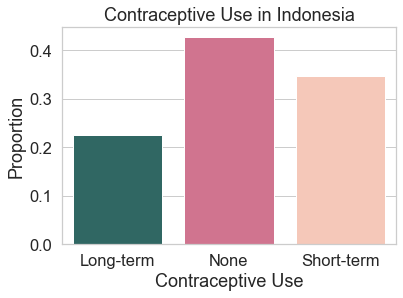

In [12]:
data.replace({"contraceptive": {1: "None", 2:"Long-term", 3:"Short-term"}}, inplace = True)

contra = sns.barplot(x = (data.groupby('contraceptive')["contraceptive"].count()/data.shape[0]).index, \
            y = (data.groupby('contraceptive')["contraceptive"].count()/data.shape[0]).values,  \
           palette=['#27706B', '#DF6589', '#FFC3AF' ])
plt.title("Contraceptive Use in Indonesia")
plt.xlabel("Contraceptive Use")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

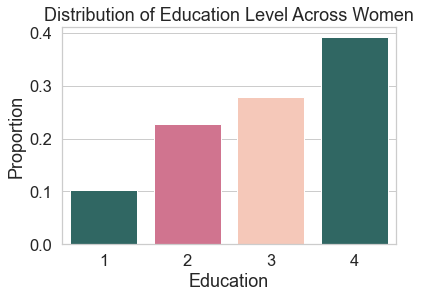

In [13]:
edu = sns.barplot(x = (data.groupby('wife_education')["wife_education"].count()/data.shape[0]).index, \
            y = (data.groupby('wife_education')["wife_education"].count()/data.shape[0]).values,  \
           palette=['#27706B', '#DF6589', '#FFC3AF'])
plt.title("Distribution of Education Level Across Women")
plt.xlabel("Education")
plt.ylabel("Proportion")

## Distributions of Features in our Binarized Data ##

Below, we binarize our data for contraception and wife education. Moreover, we combine the middle-low and middle-high standard of living into one class. This change was made in an attempt to balance our data within these features and gain more predictive power. 

In [5]:
data_binary = data.copy()
data_binary.replace({"contraceptive": {1: "None", 2:"Use", 3:"Use"}}, inplace = True)

data_binary.replace({"wife_education": {1: "Incomp Prim", 2:"Incomp Prim", 3:"Comp Prim", 4:"Comp Prim"}}, \
                    inplace = True)

data_binary.replace({"standard_living": {1: "Low", 2:"Middle", 3:"Middle", 4:"High"}}, \
                    inplace = True)

EDA to explore the distribution of use & no use of contraception in our data 

Text(0, 0.5, 'Proportion')

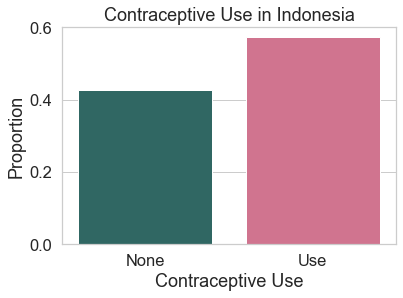

In [8]:
use = sns.barplot(x = (data_binary.groupby('contraceptive')["contraceptive"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('contraceptive')["contraceptive"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Contraceptive Use in Indonesia")
plt.xlabel("Contraceptive Use")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

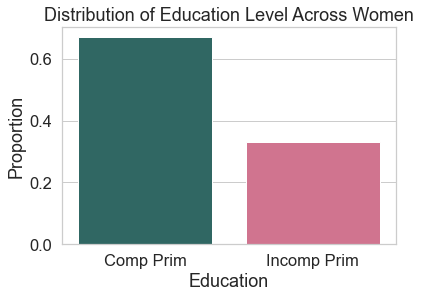

In [9]:
edu = sns.barplot(x = (data_binary.groupby('wife_education')["wife_education"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('wife_education')["wife_education"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589'])
plt.title("Distribution of Education Level Across Women")
plt.xlabel("Education")
plt.ylabel("Proportion")

Text(0, 0.5, 'Proportion')

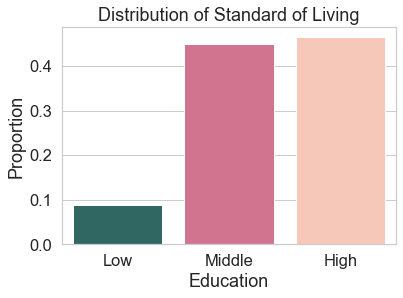

In [10]:
stand_living = sns.barplot(x = (data_binary.groupby('standard_living')["standard_living"].count()/data_binary.shape[0]).index, \
            y = (data_binary.groupby('standard_living')["standard_living"].count()/data_binary.shape[0]).values,  \
           palette=['#27706B', '#DF6589', '#FFC3AF'], order = ["Low", "Middle", "High"])
plt.title("Distribution of Standard of Living")
plt.xlabel("Education")
plt.ylabel("Proportion")